# Datos de Hoteles

En este notebook analizaremos un dataset de reservas hoteleras, realizando modificaciones y adaptaciones para facilitar su estudio y visualización. Exploraremos las características principales de las reservas, los tipos de clientes, los canales de distribución y otros aspectos relevantes para comprender el comportamiento de los huéspedes y las tendencias en el sector hotelero.

In [ ]:
!pip install pandas matplotlib seaborn pyodbc

In [2]:
import pandas as pd
df = pd.read_csv('../data/raw/bookings_hotel.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Importación de librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Modificaciones del dataset, adaptado a nuestros requisitos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
import pandas as pd

# Unir columnas y crear la fecha como string
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

# Convertir a datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y-%B-%d')

# Formatear como string YYYY-MM-DD
df['arrival_date'] = df['arrival_date'].dt.strftime('%Y-%m-%d')

# Calcular el número de dias
df['days_of_reservation'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Generar la columna de fecha de salida con los días de reserva
df['departure_date'] = pd.to_datetime(df['arrival_date']) + pd.to_timedelta(df['days_of_reservation'], unit='d')

# Formatear columna children a int
df['children'] = df['children'].fillna(0).astype(int)

# Eliminar columnas innecesarias
df = df.drop(['agent', 'company', 'arrival_date_week_number', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'lead_time', 'reserved_room_type', 'assigned_room_type', 'babies',
              'stays_in_weekend_nights', 'stays_in_week_nights', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'reservation_status', 'previous_cancellations',
              ], axis=1)


Agregar Datos de los húespedes

In [6]:
import numpy as np

# Crear columnas para hombres y mujeres
df['mens'] = 0
df['womens'] = 0

# Asignar valores basados en el número de adultos
df.loc[df['adults'] == 1, 'mens'] = 1  # Si hay 1 adulto, asignar como hombre
df.loc[df['adults'] == 2, ['mens', 'womens']] = 1  # Si hay 2 adultos, asignar 1 y 1
df.loc[df['adults'] > 2, 'mens'] = df.loc[df['adults'] > 2, 'adults'] - 1  # Si hay más de 2, asignar n-1 hombres
df.loc[df['adults'] > 2, 'womens'] = 1  # Y 1 mujer

# Crear lista de rangos de edad con probabilidades
# Mayor probabilidad para 18-30 y 65+
rangos = ['18-30', '31-50', '51-65', '65+']
probabilidades = [0.4, 0.15, 0.15, 0.3]  # 40% para 18-30, 30% para 65+, resto distribuido

# Generar rangos de edad aleatorios basados en probabilidades
rangos_edad = np.random.choice(rangos, size=len(df), p=probabilidades)


# Convertir booleanos a 0 y 1
df['age_18-30'] = (rangos_edad == '18-30').astype(int)
df['age_31-50'] = (rangos_edad == '31-50').astype(int)
df['age_51-65'] = (rangos_edad == '51-65').astype(int)
df['age_65+'] = (rangos_edad == '65+').astype(int)



In [7]:
df.head()

,hotel,is_canceled,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,...,reservation_status_date,arrival_date,days_of_reservation,departure_date,mens,womens,age_18-30,age_31-50,age_51-65,age_65+
0,Resort Hotel,0,2,0,BB,PRT,Direct,Direct,0,0,...,2015-07-01,2015-07-01,0,2015-07-01,1,1,1,0,0,0
1,Resort Hotel,0,2,0,BB,PRT,Direct,Direct,0,0,...,2015-07-01,2015-07-01,0,2015-07-01,1,1,1,0,0,0
2,Resort Hotel,0,1,0,BB,GBR,Direct,Direct,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,0,0,0,1
3,Resort Hotel,0,1,0,BB,GBR,Corporate,Corporate,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,0,0,0,1
4,Resort Hotel,0,2,0,BB,GBR,Online TA,TA/TO,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,0,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   adults                          119390 non-null  int64         
 3   children                        119390 non-null  int64         
 4   meal                            119390 non-null  object        
 5   country                         118902 non-null  object        
 6   market_segment                  119390 non-null  object        
 7   distribution_channel            119390 non-null  object        
 8   is_repeated_guest               119390 non-null  int64         
 9   previous_bookings_not_canceled  119390 non-null  int64         
 10  customer_type                   119390 non-null  object 

## Descripción de Datos

### 🍽️ Tipos de Régimen Alimenticio (`meal`)

| Código     | Significado       | Descripción                                                                 |
|------------|-------------------|------------------------------------------------------------------------------|
| `BB`       | Bed & Breakfast    | Alojamiento con desayuno incluido.                                          |
| `FB`       | Full Board         | Pensión completa: desayuno, almuerzo y cena incluidos.                      |
| `HB`       | Half Board         | Media pensión: desayuno y una comida adicional (almuerzo o cena).           |
| `SC`       | Self Catering      | Solo alojamiento, sin comidas incluidas.                                    |
| `Undefined`| No definido        | El régimen alimenticio no fue especificado o no se encuentra en la base.    |


### 🧍 Tipos de Cliente (`customer_type`)

| Código        | Descripción                                                                                   |
|---------------|-----------------------------------------------------------------------------------------------|
| `Parejas`     | Clientes que viajan en pareja, usualmente sin contratos previos ni condiciones especiales.    |
| `Familias`    | Clientes que viajan en grupo familiar, incluyendo niños y adultos.                            |
| `Jóvenes`     | Grupos de clientes jóvenes que viajan juntos, como amigos o en pequeñas excursiones.          |
| `Tercera Edad`| Clientes adultos mayores que suelen viajar en grupos organizados, como tours o eventos.       |



### 🛎️ Canal de Distribución (`distribution_channel`)

| Código      | Significado                             | Descripción                                                                 |
|-------------|------------------------------------------|------------------------------------------------------------------------------|
| `Direct`    | Directo                                  | El cliente reservó directamente con el hotel (por teléfono, web propia, etc.). |
| `Corporate` | Corporativo                              | Reserva realizada a través de acuerdos con empresas o agencias corporativas. |
| `TA/TO`     | Travel Agent / Tour Operator             | Reserva gestionada por agencias de viaje o turoperadores.                   |
| `GDS`       | Global Distribution System               | Plataforma global de reservas (como Amadeus, Sabre, Galileo, etc.).         |
| `Undefined` | No definido                              | El canal de distribución no fue especificado en el registro.                |

### 📊 Segmento de Mercado (`market_segment`)

| Código           | Significado                           | Descripción                                                                 |
|------------------|----------------------------------------|------------------------------------------------------------------------------|
| `Direct`         | Directo                                | El cliente contactó y reservó directamente con el hotel.                    |
| `Corporate`      | Corporativo                            | Reservas hechas por empresas o con acuerdos corporativos.                   |
| `Online TA`      | Agencia de viajes online               | Reservas a través de plataformas como Booking.com, Expedia, etc.            |
| `Offline TA/TO`  | Agencia/Turoperador offline            | Reservas hechas mediante agencias tradicionales o turoperadores físicos.    |
| `Complementary`  | Complementaria                         | Estancia gratuita (por ejemplo, cortesía, promociones, empleados, etc.).    |
| `Groups`         | Grupos                                 | Reservas de grupos grandes organizados (tours, eventos, etc.).              |
| `Undefined`      | No definido                            | El segmento no fue especificado o está sin clasificar.                      |
| `Aviation`       | Aviación                               | Reservas vinculadas a aerolíneas (tripulación, convenios, retrasos, etc.).  |



Eliminar reservas que tengan dias = 0

In [9]:
df.drop(df[df['days_of_reservation'] == 0].index, inplace=True)
df.head()

,hotel,is_canceled,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,...,reservation_status_date,arrival_date,days_of_reservation,departure_date,mens,womens,age_18-30,age_31-50,age_51-65,age_65+
2,Resort Hotel,0,1,0,BB,GBR,Direct,Direct,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,0,0,0,1
3,Resort Hotel,0,1,0,BB,GBR,Corporate,Corporate,0,0,...,2015-07-02,2015-07-01,1,2015-07-02,1,0,0,0,0,1
4,Resort Hotel,0,2,0,BB,GBR,Online TA,TA/TO,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,0,0,1,0
5,Resort Hotel,0,2,0,BB,GBR,Online TA,TA/TO,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,1,0,0,0
6,Resort Hotel,0,2,0,BB,PRT,Direct,Direct,0,0,...,2015-07-03,2015-07-01,2,2015-07-03,1,1,0,0,1,0


In [10]:
# Actualizar la columna 'customer_type' segun las condiciones
# Poner a todos los clientes como 'Not Assigned' inicialmente
df['customer_type'] = 'Not Assigned'
# Familia: Al menos un adulto y un niño
df.loc[(df['adults'] > 0) & (df['children'] > 0), 'customer_type'] = 'Familia'
# Pareja: Al menos dos adultos y sin niños
df.loc[(df['adults'] >= 2) & (df['children'] == 0), 'customer_type'] = 'Pareja'
# Jóvenes: Un adulto y sin niños, pero con edad entre 18-30
df.loc[(df['adults'] == 1) & (df['children'] == 0) & (df['age_18-30'] == 1), 'customer_type'] = 'Jóvenes'
# Tercera Edad: Al menos un adulto y sin niños, pero con edad 65+
df.loc[(df['adults'] > 0) & (df['children'] == 0) & (df['age_65+'] == 1), 'customer_type'] = 'Tercera Edad'
# Otras: Cualquier otro caso que no cumpla las condiciones anteriores
df.loc[df['customer_type'] == 'Not Assigned', 'customer_type'] = 'Otras'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118675 entries, 2 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118675 non-null  object        
 1   is_canceled                     118675 non-null  int64         
 2   adults                          118675 non-null  int64         
 3   children                        118675 non-null  int64         
 4   meal                            118675 non-null  object        
 5   country                         118201 non-null  object        
 6   market_segment                  118675 non-null  object        
 7   distribution_channel            118675 non-null  object        
 8   is_repeated_guest               118675 non-null  int64         
 9   previous_bookings_not_canceled  118675 non-null  int64         
 10  customer_type                   118675 non-null  object      

In [12]:
# Renombrar las columnas a español
df.rename(columns={
    'hotel': 'hotel',
    'is_canceled': 'cancelado',
    'adults': 'adultos',
    'children': 'ninos',
    'babies': 'bebes',
    'meal': 'regimen',
    'country': 'nacionalidad_huesped',
    'market_segment': 'publico_objetivo',
    'distribution_channel': 'canal_distribucion',
    'is_repeated_guest': 'cliente_recurrente',
    'previous_bookings_not_canceled': 'reservas_previas_no_canceladas',
    'customer_type': 'tipo_cliente',
    'required_car_parking_spaces': 'plazas_aparcamiento',
    'reservation_status_date': 'fecha_estado_reserva',
    'arrival_date': 'fecha_llegada',
    'departure_date': 'fecha_salida',
    'days_of_reservation': 'dias_reserva',
    'mens': 'hombres',
    'womens': 'mujeres',
    'age_18-30': 'edad_18-30',
    'age_31-50': 'edad_31-50',
    'age_51-65': 'edad_51-65',
    'age_65+': 'edad_65+',
}, inplace=True)


In [13]:
columnas_ordenadas = [
    # Hotel / Reserva
    'hotel', 'cancelado', 'regimen', 'canal_distribucion',
    'tipo_cliente', 'cliente_recurrente', 'reservas_previas_no_canceladas',
    
    # Cliente
    'adultos', 'ninos', 'hombres', 'mujeres', 'edad_18-30', 'edad_31-50', 'edad_51-65', 'edad_65+',
    'nacionalidad_huesped', 'publico_objetivo',
    
    # Fechas
    'fecha_estado_reserva', 'fecha_llegada', 'fecha_salida', 'dias_reserva',
    
    # Otros
    'plazas_aparcamiento'
]

df = df[columnas_ordenadas]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118675 entries, 2 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118675 non-null  object        
 1   cancelado                       118675 non-null  int64         
 2   regimen                         118675 non-null  object        
 3   canal_distribucion              118675 non-null  object        
 4   tipo_cliente                    118675 non-null  object        
 5   cliente_recurrente              118675 non-null  int64         
 6   reservas_previas_no_canceladas  118675 non-null  int64         
 7   adultos                         118675 non-null  int64         
 8   ninos                           118675 non-null  int64         
 9   hombres                         118675 non-null  int64         
 10  mujeres                         118675 non-null  int64       

In [14]:
df.head()

,hotel,cancelado,regimen,canal_distribucion,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,ninos,hombres,...,edad_31-50,edad_51-65,edad_65+,nacionalidad_huesped,publico_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,dias_reserva,plazas_aparcamiento
2,Resort Hotel,0,BB,Direct,Tercera Edad,0,0,1,0,1,...,0,0,1,GBR,Direct,2015-07-02,2015-07-01,2015-07-02,1,0
3,Resort Hotel,0,BB,Corporate,Tercera Edad,0,0,1,0,1,...,0,0,1,GBR,Corporate,2015-07-02,2015-07-01,2015-07-02,1,0
4,Resort Hotel,0,BB,TA/TO,Pareja,0,0,2,0,1,...,0,1,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0
5,Resort Hotel,0,BB,TA/TO,Pareja,0,0,2,0,1,...,0,0,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0
6,Resort Hotel,0,BB,Direct,Pareja,0,0,2,0,1,...,0,1,0,PRT,Direct,2015-07-03,2015-07-01,2015-07-03,2,0


## Configurar nuestros hoteles
En el Dataset actual existen unicamente dos hoteles, agregaremos más hoteles y sus respectivas ubicaciones.


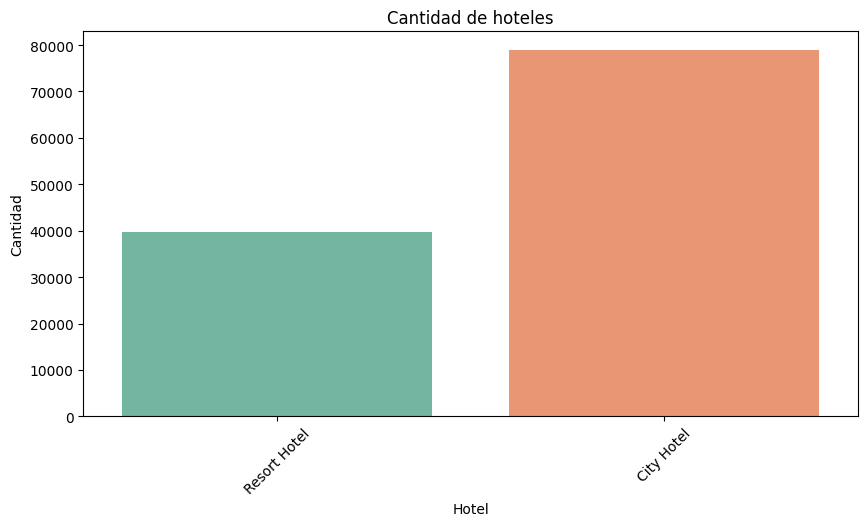

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica para ver la cantidad de hoteles
plt.figure(figsize=(10, 5))
sns.countplot(x='hotel', data=df, palette='Set2')
plt.title('Cantidad de hoteles')
plt.xlabel('Hotel')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


### Hoteles elegidos para esta práctica
| Hotel                           | Ubicación   | Público objetivo                                                                 |
|--------------------------------|-------------|----------------------------------------------------------------------------------|
| Mandarin Oriental Ritz         | Madrid      | Turistas internacionales que quieren disfrutar de las mejores zonas de Madrid, gracias a su buena ubicación en el centro.      |
| Gran Hotel Bali                | Benidorm    | Grupos de personas jubiladas y grupos que buscan ocio, piscinas y playa, en cualquier época del año, gracias a los viajes del imserso. |
| Parador de Cádiz               | Cádiz       | Parejas y viajeros que buscan una escapada para disfrutar de su gatronomía y sus playas gracias a su buen tiempo durante casi todo el año.  |
| Eurostars Hotel de La Reconquista | Asturias | Clientes que buscan un hotel centrico para hacer turismo historico por la ciudad.         |
| Hotel Arts Barcelona           | Barcelona   | Turistas de lujo que buscan una experiencia de premium en la ciudad de Barcelona, con gran ubicacioón frente al mar y su alta calidad de servicio. |

In [16]:
# Crear un mapeo de los hoteles originales a los nuevos nombres
hotel_mapping = {
    'Resort Hotel': 'Gran Hotel Bali',  # Mayor proporción de 65+ por el IMSERSO
    'City Hotel': 'Mandarin Oriental Ritz'  # Más diversificado en edades
}

# Crear un diccionario con las ubicaciones
ubicaciones = {
    'Gran Hotel Bali': 'Benidorm',
    'Mandarin Oriental Ritz': 'Madrid',
    'Parador de Cádiz': 'Cádiz',
    'Eurostars Hotel de La Reconquista': 'Asturias',
    'Hotel Arts Barcelona': 'Barcelona'
}

# Reemplazar inicialmente los nombres según el mapeo original
df['hotel'] = df['hotel'].map(hotel_mapping)
df['ubicación'] = df['hotel'].map(ubicaciones)

# Reasignar hoteles considerando la demografía
# Gran Hotel Bali - preferencia para 65+
indices_mayores = df[df['edad_65+'] == 1].sample(frac=0.4).index
df.loc[indices_mayores, 'hotel'] = 'Gran Hotel Bali'
df.loc[indices_mayores, 'ubicación'] = 'Benidorm'

# Hotel Arts Barcelona - preferencia para 31-50 (turismo de lujo)
indices_mediana = df[df['edad_31-50'] == 1].sample(frac=0.4).index
df.loc[indices_mediana, 'hotel'] = 'Hotel Arts Barcelona'
df.loc[indices_mediana, 'ubicación'] = 'Barcelona'

# Parador de Cádiz - preferencia para parejas (distribución mixta)
indices_parejas = df[df['adultos'] == 2].sample(frac=0.2).index
df.loc[indices_parejas, 'hotel'] = 'Parador de Cádiz'
df.loc[indices_parejas, 'ubicación'] = 'Cádiz'

# Eurostars Hotel - preferencia para turismo cultural (distribución mixta)
indices_restantes = df[~df.index.isin(indices_mayores) & 
                      ~df.index.isin(indices_mediana) & 
                      ~df.index.isin(indices_parejas)].sample(frac=0.25).index
df.loc[indices_restantes, 'hotel'] = 'Eurostars Hotel de La Reconquista'
df.loc[indices_restantes, 'ubicación'] = 'Asturias'



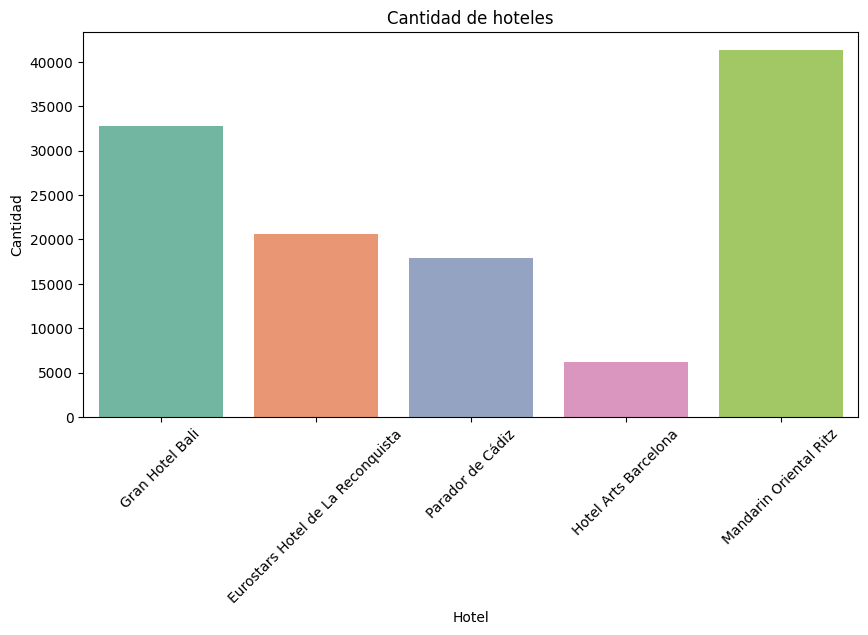

In [17]:
# grafica para ver los hoteles
plt.figure(figsize=(10, 5))
sns.countplot(x='hotel', data=df, palette='Set2')
plt.title('Cantidad de hoteles')
plt.xlabel('Hotel')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [18]:
df.head()

,hotel,cancelado,regimen,canal_distribucion,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,ninos,hombres,...,edad_51-65,edad_65+,nacionalidad_huesped,publico_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,dias_reserva,plazas_aparcamiento,ubicación
2,Gran Hotel Bali,0,BB,Direct,Tercera Edad,0,0,1,0,1,...,0,1,GBR,Direct,2015-07-02,2015-07-01,2015-07-02,1,0,Benidorm
3,Eurostars Hotel de La Reconquista,0,BB,Corporate,Tercera Edad,0,0,1,0,1,...,0,1,GBR,Corporate,2015-07-02,2015-07-01,2015-07-02,1,0,Asturias
4,Parador de Cádiz,0,BB,TA/TO,Pareja,0,0,2,0,1,...,1,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0,Cádiz
5,Parador de Cádiz,0,BB,TA/TO,Pareja,0,0,2,0,1,...,0,0,GBR,Online TA,2015-07-03,2015-07-01,2015-07-03,2,0,Cádiz
6,Eurostars Hotel de La Reconquista,0,BB,Direct,Pareja,0,0,2,0,1,...,1,0,PRT,Direct,2015-07-03,2015-07-01,2015-07-03,2,0,Asturias


### Gráficas descriptivas de los datos.

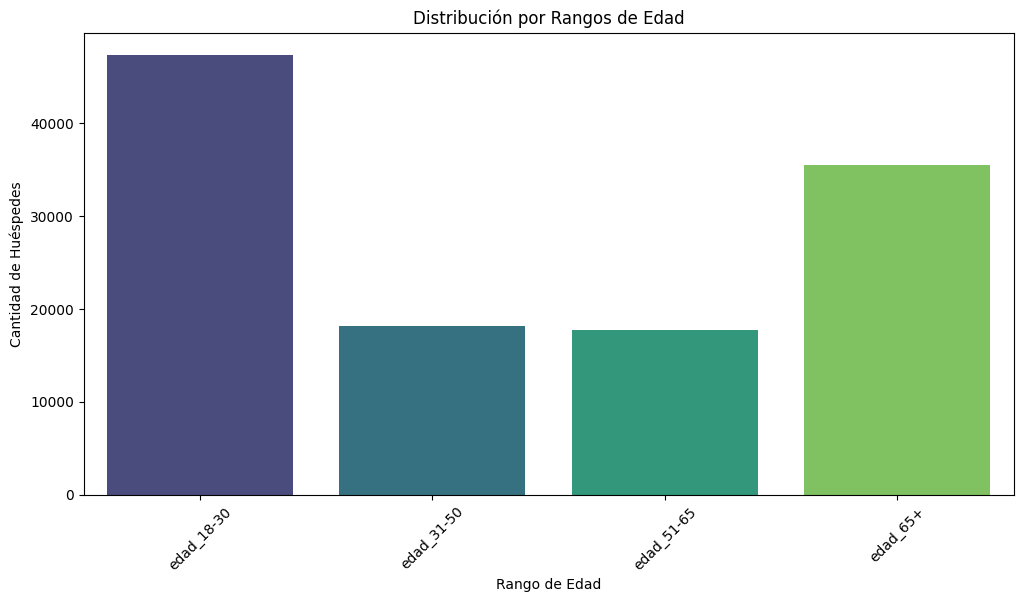

In [19]:
# Gráfica para ver la distribución de los huéspedes por edad

plt.figure(figsize=(12, 6))

edad_cols = ['edad_18-30', 'edad_31-50', 'edad_51-65', 'edad_65+']
valores = df[edad_cols].sum()
sns.barplot(x=valores.index, y=valores.values, palette='viridis')
plt.title('Distribución por Rangos de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Huéspedes')
plt.xticks(rotation=45)
plt.show()

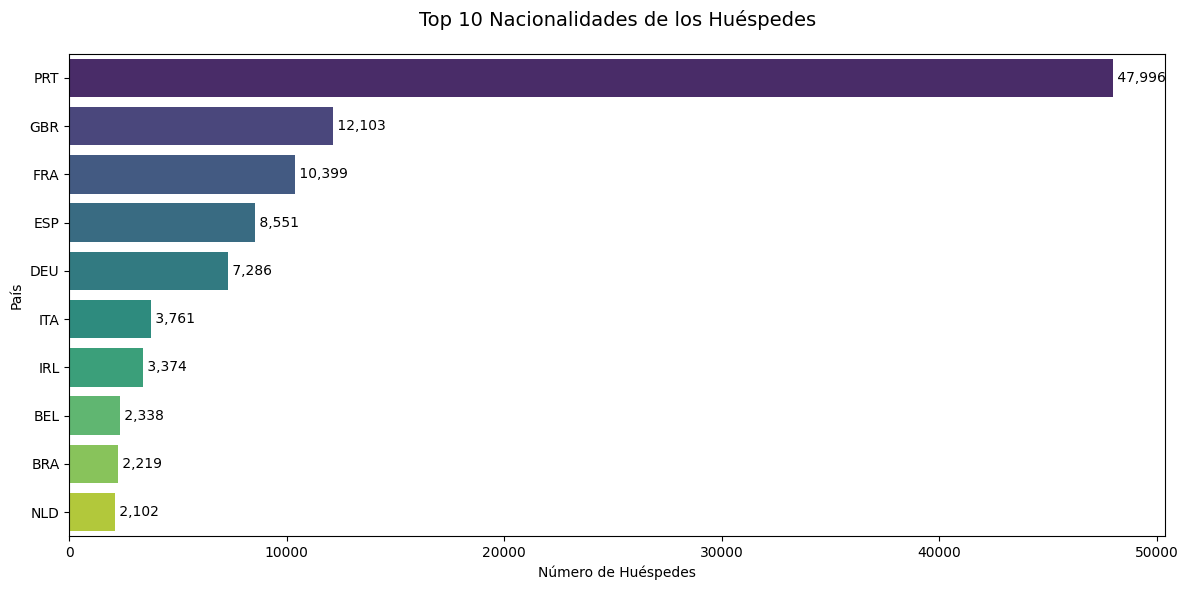

In [20]:
# Gráfica para ver la distribución de los huéspedes por nacionalidad

top_nacionalidades = df['nacionalidad_huesped'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_nacionalidades.values, 
                 y=top_nacionalidades.index, 
                 palette='viridis')

plt.title('Top 10 Nacionalidades de los Huéspedes', pad=20, size=14)
plt.xlabel('Número de Huéspedes')
plt.ylabel('País')

for i, v in enumerate(top_nacionalidades.values):
    ax.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()

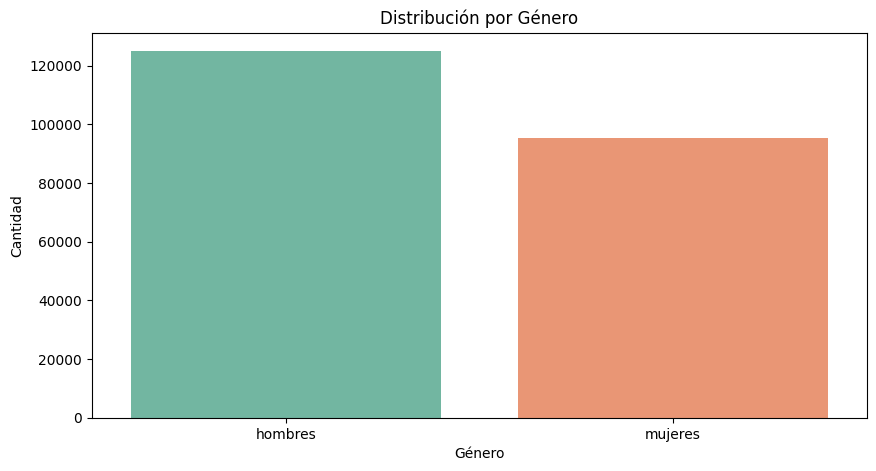

In [21]:
# Gráfica para ver la distribución de los huéspedes por género (hombres y mujeres)
plt.figure(figsize=(10, 5))
df_melted = df[['hombres', 'mujeres']].sum()
sns.barplot(x=df_melted.index, y=df_melted.values, palette='Set2')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

In [22]:
# Convertir todas las columnas y valores de tipo string a minúsculas
df.columns = df.columns.str.lower()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()


## Segmentación de Reservas por fechas 2019 - 2024
Cambiar las fechas de los registros de: llegada, salida y estado de reserva, en el rango de 2019 a 2024

In [23]:
# Cambiar las fechas de los registros de: llegada, salida y estado de reserva, en el rango de 2019 a 2024
import random
from datetime import timedelta
import numpy as np
from datetime import datetime

# Definir el rango de fechas
start_date = datetime(2019, 1, 1)
end_date = datetime(2024, 12, 31)
# Calcular la diferencia en días entre las fechas
delta = (end_date - start_date).days
# Generar fechas aleatorias dentro del rango
random_dates = [start_date + timedelta(days=random.randint(0, delta)) for _ in range(len(df))]
# Asignar las fechas aleatorias a las columnas correspondientes
df['fecha_llegada'] = random_dates
df['fecha_salida'] = df['fecha_llegada'] + pd.to_timedelta(df['dias_reserva'], unit='d')
df['fecha_estado_reserva'] = random_dates
# Convertir las fechas a formato string YYYY-MM-DD
df['fecha_llegada'] = df['fecha_llegada'].dt.strftime('%Y-%m-%d')
df['fecha_salida'] = df['fecha_salida'].dt.strftime('%Y-%m-%d')
df['fecha_estado_reserva'] = df['fecha_estado_reserva'].dt.strftime('%Y-%m-%d')
# Ver el dataframe limpio
df.head()

,hotel,cancelado,regimen,canal_distribucion,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,ninos,hombres,...,edad_51-65,edad_65+,nacionalidad_huesped,publico_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,dias_reserva,plazas_aparcamiento,ubicación
2,gran hotel bali,0,bb,direct,tercera edad,0,0,1,0,1,...,0,1,gbr,direct,2024-04-08,2024-04-08,2024-04-09,1,0,benidorm
3,eurostars hotel de la reconquista,0,bb,corporate,tercera edad,0,0,1,0,1,...,0,1,gbr,corporate,2022-10-19,2022-10-19,2022-10-20,1,0,asturias
4,parador de cádiz,0,bb,ta/to,pareja,0,0,2,0,1,...,1,0,gbr,online ta,2020-04-29,2020-04-29,2020-05-01,2,0,cádiz
5,parador de cádiz,0,bb,ta/to,pareja,0,0,2,0,1,...,0,0,gbr,online ta,2023-05-11,2023-05-11,2023-05-13,2,0,cádiz
6,eurostars hotel de la reconquista,0,bb,direct,pareja,0,0,2,0,1,...,1,0,prt,direct,2020-02-29,2020-02-29,2020-03-02,2,0,asturias


In [24]:
import pyodbc
import pandas as pd
import os
from dotenv import load_dotenv
# Cargar variables de entorno desde archivo .env si existe
load_dotenv()

# Obtener las credenciales desde las variables de entorno
server = os.getenv('DB_SERVER')
username = os.getenv('DB_USERNAME')
password = os.getenv('DB_PASSWORD')
database = os.getenv('DB_DATABASE')

# Usamos autenticación interactiva con cuenta Microsoft
conn_str = (
    f'DRIVER={{ODBC Driver 18 for SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password};'
    'Encrypt=yes;TrustServerCertificate=yes;Connection Timeout=30;'
)

In [25]:
# Consulta para obtener los datos sin la cabecera por defecto
query = """
SELECT * FROM dbo.campaing
"""
try:
    # Establecer conexión
    conn = pyodbc.connect(conn_str)
    # Leer datos en un DataFrame de pandas
    df_campaing = pd.read_sql(query, conn)
    # Mostrar las primeras filas del DataFrame
    df_campaing.columns = df_campaing.iloc[0]
    df_campaing = df_campaing.drop(df_campaing.index[0]) 
    print(df_campaing.head())
except pyodbc.Error as e:
    print("Error al conectar a la base de datos:", e)
finally:
    # Cerrar la conexión
    if 'conn' in locals():
        conn.close()
        print("Conexión cerrada.")
    else:
        print("No se estableció conexión.")

0                                             nombre lanzamiento_inicio  \
1     parador de cádiz campaña 2019 - 1 semana santa         2019-02-08   
2     parador de cádiz campaña 2019 - 2 semana santa         2019-03-04   
3  eurostars hotel de la reconquista campaña 2019...         2019-03-01   
4  eurostars hotel de la reconquista campaña 2019...         2019-11-02   
5            gran hotel bali campaña 2019 - 1 verano         2019-06-13   

0 lanzamiento_fin fecha_inicio   fecha_fin publico_objetivo    region  \
1      2019-03-01   2019-04-05  2019-04-20          parejas     cádiz   
2      2019-03-19   2019-04-09  2019-04-19         familias     cádiz   
3      2019-03-27   2019-04-12  2019-04-20          jóvenes  asturias   
4      2019-11-25   2019-12-26  2019-12-31          jóvenes  asturias   
5      2019-07-07   2019-07-24  2019-08-19     tercera edad  benidorm   

0                              hotel  
1                   parador de cádiz  
2                   parador de c

In [26]:
reglas_por_hotel = {
    "parador de cádiz": {
        2019: 0.90,
        2020: 0.8,
        2021: 0.76,
        2022: 0.81,
        2023: 0.79,
        2024: 0.75,
    },
    "eurostars hotel de la reconquista": {
        2019: 0.0,
        2020: 0.0,
        2021: 0.0,
        2022: 0.23,
        2023: 0.3,
        2024: 0.0,
    },
    "gran hotel bali": {
        2019: 0.7,
        2020: 0.56,
        2021: 0.67,
        2022: 0.7,
        2023: 0.65,
        2024: 0.75,
    },
    "mandarin oriental ritz": {
        2019: 0.35,
        2020: 0.2,
        2021: 0.1,
        2022: 0.3,
        2023: 0.25,
        2024: 0.3,
    },
    "hotel arts barcelona": {
        2019: 0.3,
        2020: 0.23,
        2021: 0.32,
        2022: 0.1,
        2023: 0.2,
        2024: 0.4,
    },
}


In [27]:
import pandas as pd
import numpy as np

# Asegurar fechas en formato datetime
df['fecha_estado_reserva'] = pd.to_datetime(df['fecha_estado_reserva'])
df['fecha_llegada'] = pd.to_datetime(df['fecha_llegada'])
df['fecha_salida'] = pd.to_datetime(df['fecha_salida'], errors='coerce')

df_campaing['lanzamiento_inicio'] = pd.to_datetime(df_campaing['lanzamiento_inicio'])
df_campaing['lanzamiento_fin'] = pd.to_datetime(df_campaing['lanzamiento_fin'])
df_campaing['fecha_inicio'] = pd.to_datetime(df_campaing['fecha_inicio'])
df_campaing['fecha_fin'] = pd.to_datetime(df_campaing['fecha_fin'])

# Función para seleccionar una campaña aleatoria válida según el año y reglas de probabilidad
def obtener_campaña_aleatoria(hotel, year, probabilidad):
    campañas_hotel = df_campaing[df_campaing['hotel'].str.lower() == hotel]
    campañas_en_año = campañas_hotel[campañas_hotel['lanzamiento_inicio'].dt.year == year]
    
    if campañas_en_año.empty:
        return None

    return campañas_en_año.sample(1).iloc[0]

# Ajuste de fechas basado en reglas probabilísticas por hotel y año
def ajustar_fechas(row):
    hotel = row['hotel'].strip().lower()
    year = row['fecha_llegada'].year
    regla = reglas_por_hotel.get(hotel)

    if not isinstance(regla, dict) or year not in regla:
        # No hay campaña definida para este hotel/año
        row['campaña_asignada'] = None
        return row

    prob = regla[year]
    if np.random.rand() > prob:
        # Según la probabilidad, se queda fuera de campaña
        row['campaña_asignada'] = None
        return row

    campaña = obtener_campaña_aleatoria(hotel, year, prob)
    if campaña is not None:
        # Fecha aleatoria dentro de lanzamiento
        lanzamiento_inicio = campaña['lanzamiento_inicio']
        lanzamiento_fin = campaña['lanzamiento_fin']
        fecha_estado = lanzamiento_inicio + pd.Timedelta(
            days=np.random.randint(0, (lanzamiento_fin - lanzamiento_inicio).days + 1)
        )

        # Fecha aleatoria dentro de campaña
        fecha_inicio = campaña['fecha_inicio']
        fecha_fin = campaña['fecha_fin']
        fecha_llegada = fecha_inicio + pd.Timedelta(
            days=np.random.randint(0, (fecha_fin - fecha_inicio).days + 1)
        )

        # Simular fecha_salida según duración original
        if pd.notnull(row['fecha_salida']):
            dias_estancia = (row['fecha_salida'] - row['fecha_llegada']).days
            dias_estancia = max(1, dias_estancia)  # mínimo 1 día
        else:
            dias_estancia = 1
        fecha_salida = fecha_llegada + pd.Timedelta(days=dias_estancia)

        # Asignar nuevas fechas y campaña
        row['fecha_estado_reserva'] = fecha_estado
        row['fecha_llegada'] = fecha_llegada
        row['fecha_salida'] = fecha_salida
        row['campaña_asignada'] = campaña['nombre']
    else:
        row['campaña_asignada'] = None

    return row

# Aplicar
df = df.apply(ajustar_fechas, axis=1)


In [28]:
df.head()

,hotel,cancelado,regimen,canal_distribucion,tipo_cliente,cliente_recurrente,reservas_previas_no_canceladas,adultos,ninos,hombres,...,edad_65+,nacionalidad_huesped,publico_objetivo,fecha_estado_reserva,fecha_llegada,fecha_salida,dias_reserva,plazas_aparcamiento,ubicación,campaña_asignada
2,gran hotel bali,0,bb,direct,tercera edad,0,0,1,0,1,...,1,gbr,direct,2024-04-08,2024-04-08,2024-04-09,1,0,benidorm,None
3,eurostars hotel de la reconquista,0,bb,corporate,tercera edad,0,0,1,0,1,...,1,gbr,corporate,2022-10-19,2022-10-19,2022-10-20,1,0,asturias,None
4,parador de cádiz,0,bb,ta/to,pareja,0,0,2,0,1,...,0,gbr,online ta,2020-07-02,2020-07-18,2020-07-20,2,0,cádiz,parador de cádiz campaña 2020 - 1 verano
5,parador de cádiz,0,bb,ta/to,pareja,0,0,2,0,1,...,0,gbr,online ta,2023-03-05,2023-04-08,2023-04-10,2,0,cádiz,parador de cádiz campaña 2023 - 2 semana santa
6,eurostars hotel de la reconquista,0,bb,direct,pareja,0,0,2,0,1,...,0,prt,direct,2020-02-29,2020-02-29,2020-03-02,2,0,asturias,None


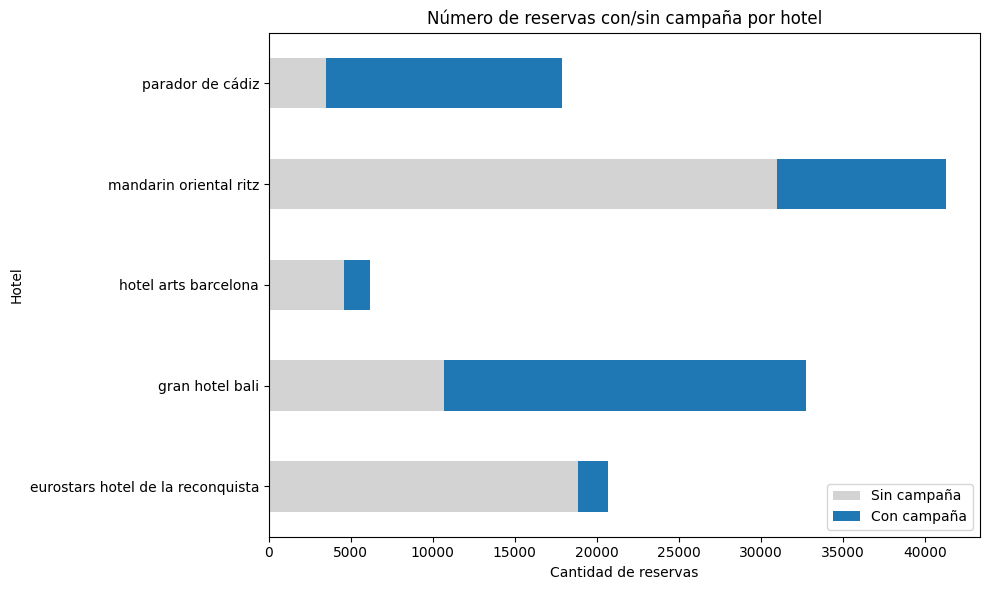

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna auxiliar
df['tiene_campaña'] = df['campaña_asignada'].notna()

# Agrupar
conteo = df.groupby(['hotel', 'tiene_campaña']).size().reset_index(name='cuenta')

# Pivotar para gráfico
pivot = conteo.pivot(index='hotel', columns='tiene_campaña', values='cuenta').fillna(0)
pivot.columns = ['Sin campaña', 'Con campaña']

# Gráfico apilado
pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#d3d3d3', '#1f77b4'])
plt.title("Número de reservas con/sin campaña por hotel")
plt.xlabel("Cantidad de reservas")
plt.ylabel("Hotel")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [30]:
# Exportar nueva data
# Convertir todas las columnas y valores de tipo string a minúsculas
df.columns = df.columns.str.lower()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

df.to_csv('../data/processed/bookings_hotel_years.csv', index=False)

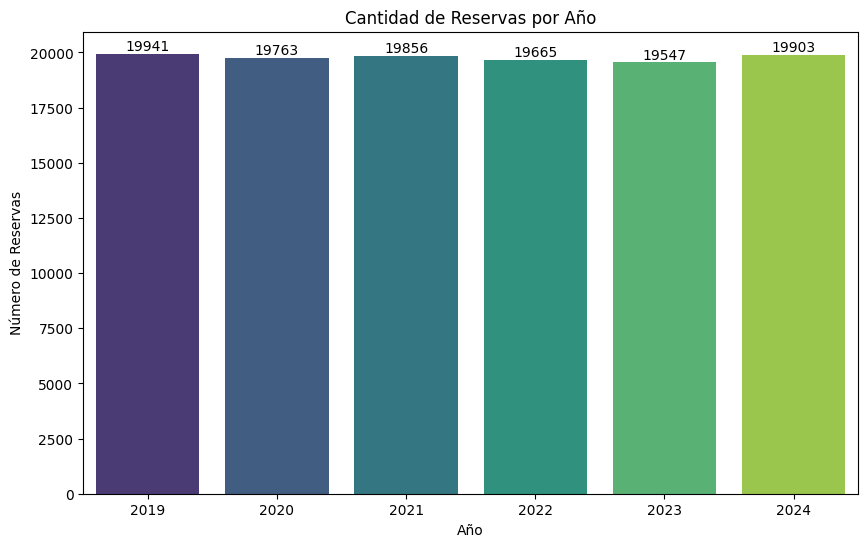

In [31]:
# Convertir fechas a datetime y extraer el año
df['año'] = pd.to_datetime(df['fecha_llegada']).dt.year

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='año', palette='viridis')
plt.title('Cantidad de Reservas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=0)

# Añadir valores sobre las barras
for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()

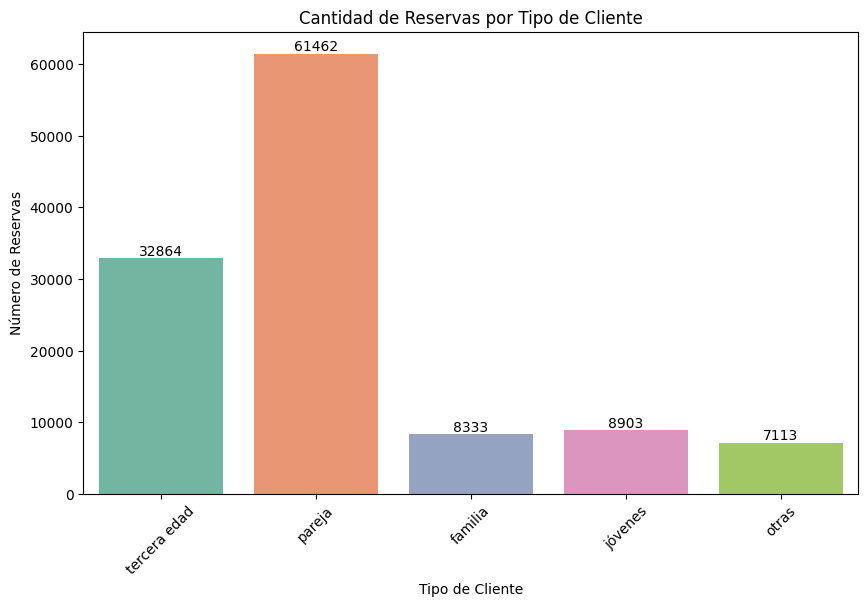

In [32]:
# Gráfica para ver las reservas por tipo de cliente
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tipo_cliente', palette='Set2')
plt.title('Cantidad de Reservas por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
# Añadir valores sobre las barras
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.show()
